In [61]:
import numpy as np
import matplotlib.pyplot as plt


[1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]
[ 3.44920498  3.44863876  4.73417563  5.61787519  7.06277222  9.00124757
  7.23571271  8.71026599  9.64275897 11.9902397 ]


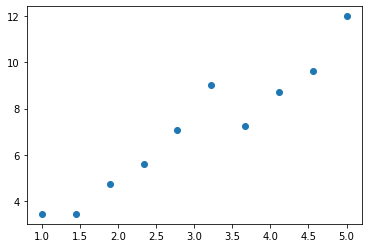

In [62]:
points=10
yinter=1
data1=np.linspace(1,5,points)  #for one data point if the point is on the x axis lasso finds a very wrong solution
print(data1)
data2=2*data1+yinter+np.random.normal(0,1,points)
print(data2)




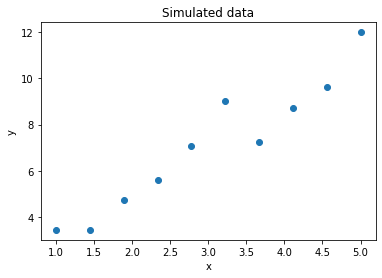

In [77]:
plt.scatter(data1,data2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated data')
plt.savefig('Simulated data',dpi=150)

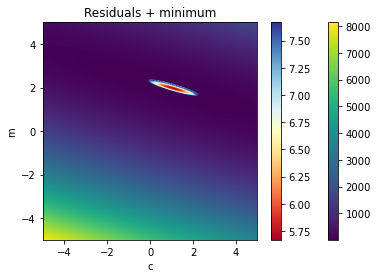

In [92]:
#this code shows that in RSS there is a true minimum value and not a continuum of minimums
#grid computing is done to calculate the residuals, not efficient.
#lasso does not work for undersampled data because the system is not sparse
def model(m,c,x):
    return m*x+c
#def model_spar(m,x)
#    return m*x   #an example of compressed sensing could be the assumption of c=0
#def model(m,c,x):
    #return np.multiply(a1,z)+c
para_points=400
mspace=para_points
m=np.linspace(-5,5,mspace)
cspace=para_points
c=np.linspace(-5,5,cspace)
#mm,cc=np.meshgrid(m,c)
z=np.zeros([mspace,cspace])
lasso=False
lamb=0.5
for k1,i in enumerate(m):
    for k2,j in enumerate(c):
        if lasso:
            z[k1,k2]=(1 / (2 * points))*np.sum(np.square((data2-model(i,j,data1))))+lamb*(abs(i)+abs(j)) #the RSS part, have to set a m and c and calculate the residuals given the observed and x values.
        else:
            z[k1,k2]=np.sum(np.square((data2-model(i,j,data1))))
            
z=np.round(z,4)
fig,ax=plt.subplots()
im=ax.pcolormesh(c,m,z,cmap='viridis') #plot c and m, then plot their corresponding residual value
fig.colorbar(im)

r,col=np.where(z<np.min(z)+2) #find location of the residuals surrounding the minimum
#r,col=np.where(z==np.min(z)) #for one data point plot this
cm = plt.cm.get_cmap('RdYlBu')
sc=plt.scatter(c[col],m[r],c=z[r,col],cmap=cm,s=0.4)  #plot residuals surrounding minimum
plt.colorbar(sc)
#ax.set_ylim([0.5,1.5])  #zoom in
#ax.set_xlim([-1.5,0.5])
ax.set_ylabel('m')
ax.set_xlabel('c')
figname='Residuals + minimum'
ax.set_title(figname)
fig.savefig(figname,dpi=150)
plt.show()

#mmin,cmin=np.where(z==np.min(z))

#the fact that there is a ring of blue (large values) and a ring of red (small values) means there has to be a gradient that leads to a singular minimum.
#also the fact that cyclic coord descent works is proof, take the partial and solve for coord when partial=0. There is only one solution to this problem not a line 

min 5.6697
y pos (m) [1.9924812] x pos (c) [1.11528822]


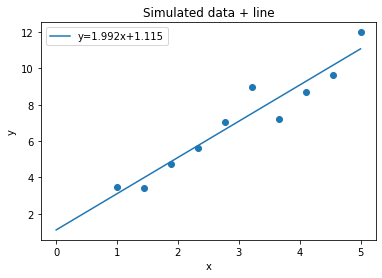

In [90]:
rmin,colmin=np.where(z==np.min(z))
print('min',np.min(z))
#print(mmin)
#print(np.where(z==np.min(z)))
print('y pos (m)',m[rmin],'x pos (c)',c[colmin])
#print('yaxis',mmin,len(m),'xaxis',cmin,len(c))
plt.scatter(data1,data2)
x=np.linspace(0,5,20)
for k,i in enumerate(m[rmin]):
    plt.plot(x,model(i,c[colmin][k],x),label='y='+str(np.round(i,3))+'x+'+str(np.round(c[colmin][k],3)))
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simulated data + line')
plt.savefig('Simulated data + line',dpi=150)